<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/pulsatile_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

file = 'IMG_3447 (1)_Trim.mp4'

cap = cv2.VideoCapture(file)

# Get frame count
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


green = []
blue = []
red = []

i = 0
ret = True
ret, frame = cap.read()

#transforms = np.zeros((n_frames-1, 3), np.float32) - don't need this
prev = frame
#convert to gray_scale
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
prev_pts = cv2.goodFeaturesToTrack(prev_gray, maxCorners=200, qualityLevel=0.01,minDistance=30,blockSize=3)
#find this set of points in all subsequent frames

for i in range(n_frames-2):

    # Capture frame-by-frame
    # Read first frame

  
    
    # measure this later on the aligned frames
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    #cv2_imshow(frame)
    #green += [g]
    #blue += [b]
   # red += [r]
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break
   #get the previous frame for image stabilization
    
   
    ret, frame = cap.read()

    curr_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    
    

  # Calculate optical flow (i.e. track feature points)

    curr_pts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, curr_gray, prev_pts, None)

  #generate and error if the shapes of prjected points do not make sense
    assert prev_pts.shape == curr_pts.shape
 
    idx = np.where(status==1)[0]
    prev_pts = prev_pts[idx]
    curr_pts = curr_pts[idx]
    #estimate the transform between the frames
    #m = cv2.estimateAffine2D(prev_pts, curr_pts)
    
    g = np.mean(frame[np.around(curr_pts[curr_pts[:,0,1]<1919]).astype(int)][1].reshape(-1))
    b = np.mean(frame[np.around(curr_pts[curr_pts[:,0,1]<1919]).astype(int)][2].reshape(-1))
    r = np.mean(frame[np.around(curr_pts[curr_pts[:,0,1]<1919]).astype(int)][0].reshape(-1))

    green += [g]
    blue += [b]
    red += [r]
    #b = np.mean(frame[:,:,2].reshape(-1))
    #r = np.mean(frame[:,:,0].reshape(-1))

    # Extract traslation
    #dx = m[0][1]
    #dy = m[0][2]
  # Extract rotation angle
    #da = np.arctan2(m[1,0], m[0,0])

    

  # Store transformation

    #transforms[i] = [dx,dy,da]

    print("Frame: " + str(i) +  "/" + str(n_frames) + " -  Tracked points : " + str(len(prev_pts)))

# When everything done, release the capture
#cap.release()
#cv2.destroyAllWindows()

Frame: 0/424 -  Tracked points : 200
Frame: 1/424 -  Tracked points : 200
Frame: 2/424 -  Tracked points : 200
Frame: 3/424 -  Tracked points : 200
Frame: 4/424 -  Tracked points : 200
Frame: 5/424 -  Tracked points : 200
Frame: 6/424 -  Tracked points : 200
Frame: 7/424 -  Tracked points : 200
Frame: 8/424 -  Tracked points : 200
Frame: 9/424 -  Tracked points : 200
Frame: 10/424 -  Tracked points : 200
Frame: 11/424 -  Tracked points : 200
Frame: 12/424 -  Tracked points : 200
Frame: 13/424 -  Tracked points : 200
Frame: 14/424 -  Tracked points : 200
Frame: 15/424 -  Tracked points : 200
Frame: 16/424 -  Tracked points : 200
Frame: 17/424 -  Tracked points : 200
Frame: 18/424 -  Tracked points : 200
Frame: 19/424 -  Tracked points : 200
Frame: 20/424 -  Tracked points : 200
Frame: 21/424 -  Tracked points : 200
Frame: 22/424 -  Tracked points : 200
Frame: 23/424 -  Tracked points : 199
Frame: 24/424 -  Tracked points : 199
Frame: 25/424 -  Tracked points : 199
Frame: 26/424 -  Track

In [0]:
green = np.array(green)
blue = np.array(blue)
red = np.array(red)

In [0]:
import matplotlib.pyplot as plt

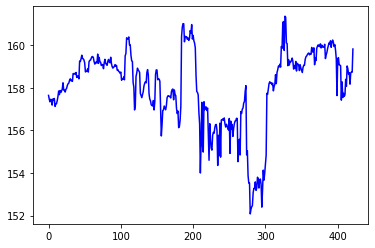

In [107]:

plt.plot(blue, 'b-')

#plt.plot(red, 'r-')

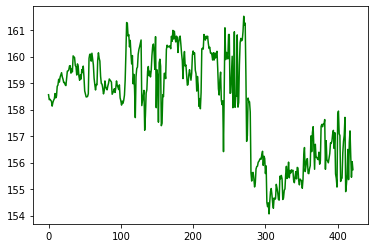

In [106]:
plt.plot(green, 'g-')

In [44]:
green.shape

(424,)

In [45]:
14/424

0.0330188679245283

In [46]:
424/14

30.285714285714285

In [0]:
#67 beats per minute measured heart rate

In [48]:
67/60

1.1166666666666667

In [49]:
(424*60)/(14*67)

27.121535181236673

In [50]:
cap

<VideoCapture 0x7fec39395270>